<h1>[Project] 지진데이터 분석
</h1>

<h2>프로젝트 목표<h2>
<h4>기상청에서 내려받은 지진정보로 데이터를 분석하여 유의미한 정보 도출</h4>
  

<h2>프로젝트 목차</h2>

<h4> 1. 데이터 읽기 </h4>
    <h5><pre> 1.1 기상청에서 내려받은 csv 파일을 읽는다</pre></h5>
    <h5><pre>자료출처 : https://data.kma.go.kr/cmmn/main.do</pre></h5>
<h4> 2. 데이터 정제 </h4>
<h5><pre> 2.1 데이터 병합</pre></h5>
<h5><pre> 2.2 중복값 제거</pre></h5>
<h5><pre> 2.3 시간칼럼에서 불필요한 시간 삭제</pre></h5>
<h5><pre> 2.4 위치 정보를 군단위까지 나타내기</pre></h5>
<h4> 3. 데이터 시각화 </h4>
    <h5><pre>3.1 2021년, 2022년 월별 지진발생횟수</pre></h5>
    <h5><pre>3.2 2021년, 2022년 지역별 지진발생횟수</pre></h5>
    <h5><pre>3.3 2021년, 2022년 지진규모별 지진발생횟수</pre></h5>
    <h5><pre>3.4 2021년, 2022년 진앙깊이별 지진발생횟수</pre></h5>


<h2>1. 데이터 불러오기</h2>

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm



In [51]:
EQK_normal = pd.read_csv("./data/EQK_normal.csv", encoding='cp949')
EQK_small = pd.read_csv("./data/EQK_small.csv", encoding='cp949')



<h2>2. 데이터 정제하기</h2>

<h3>2.1 데이터 병합</h3>

In [52]:
EQK = pd.merge(EQK_normal, EQK_small, how='outer')
print(len(EQK))
print(len(EQK_normal))
print(len(EQK_small))
EQK = pd.DataFrame(EQK)


1401
133
1268


In [53]:
EQK.head()

,시간,규모,진앙(km),위도,경도,위치
0,2021-01-14 08:17:28,2.1,0,36.86,125.43,충남 태안군 서격렬비도 북북서쪽 30km 해역
1,2021-01-24 06:23:05,2.1,11,35.84,125.14,전북 군산시 어청도 서남서쪽 81km 해역
2,2021-02-03 12:17:56,2.2,8,37.32,126.24,인천 옹진군 서남서쪽 38km 해역
3,2021-02-06 04:40:03,2.7,5,35.81,127.53,전북 장수군 북쪽 18km 지역
4,2021-02-08 03:37:34,3.2,24,40.67,127.45,북한 함경남도 장진 북북동쪽 37km 지역


In [54]:
EQK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 1400
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시간      1401 non-null   object 
 1   규모      1401 non-null   float64
 2   진앙(km)  1401 non-null   int64  
 3   위도      1401 non-null   float64
 4   경도      1401 non-null   float64
 5   위치      1401 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 76.6+ KB


In [55]:
EQK.describe(include='all')

,시간,규모,진앙(km),위도,경도,위치
count,1401,1401.000000,1401.000000,1401.000000,1401.000000,1401
unique,1399,NaN,NaN,NaN,NaN,991
top,2021-03-09 16:53:19,NaN,NaN,NaN,NaN,경북 경주시 남남서쪽 11km 지역
freq,2,NaN,NaN,NaN,NaN,26
mean,NaN,1.471235,12.196288,36.178637,127.836731,NaN
std,NaN,0.440609,5.289276,1.314145,1.404713,NaN
min,NaN,0.400000,0.000000,32.930000,124.300000,NaN
25%,NaN,1.200000,9.000000,35.650000,126.790000,NaN
50%,NaN,1.400000,12.000000,36.100000,127.930000,NaN
75%,NaN,1.700000,16.000000,36.750000,129.180000,NaN


<h3>2.2 중복값 제거</h3>

In [56]:
EQK[EQK.duplicated(keep=False)]

,시간,규모,진앙(km),위도,경도,위치
271,2021-03-09 16:53:19,1.1,17,36.43,128.32,경북 상주시 동쪽 15km 지역
272,2021-03-09 16:53:19,1.1,17,36.43,128.32,경북 상주시 동쪽 15km 지역
273,2021-03-09 23:02:34,1.2,16,35.77,129.18,경북 경주시 남남서쪽 10km 지역
274,2021-03-09 23:02:34,1.2,16,35.77,129.18,경북 경주시 남남서쪽 10km 지역


In [57]:
EQK = EQK.drop_duplicates()
EQK.describe(include='all')

,시간,규모,진앙(km),위도,경도,위치
count,1399,1399.000000,1399.000000,1399.000000,1399.000000,1399
unique,1399,NaN,NaN,NaN,NaN,991
top,2021-01-14 08:17:28,NaN,NaN,NaN,NaN,경북 경주시 남남서쪽 11km 지역
freq,1,NaN,NaN,NaN,NaN,26
mean,NaN,1.471694,12.190136,36.178749,127.835425,NaN
std,NaN,0.440752,5.290517,1.315022,1.405198,NaN
min,NaN,0.400000,0.000000,32.930000,124.300000,NaN
25%,NaN,1.200000,9.000000,35.650000,126.790000,NaN
50%,NaN,1.400000,12.000000,36.100000,127.930000,NaN
75%,NaN,1.700000,16.000000,36.750000,129.180000,NaN


<h3>2.3 시간 칼럼에서 불필요한 시간을 삭제</h3>

In [58]:
EQK['시간'] = EQK['시간'].apply(lambda x: x.split(" ")[0])

<h3>2.4 위치 정보를 군단위까지 나타내기</h3>

In [59]:
EQK['위치'] = EQK['위치'].apply(lambda x: x.split(" ")[0:-3])

In [60]:
EQK.head()

,시간,규모,진앙(km),위도,경도,위치
0,2021-01-14,2.1,0,36.86,125.43,"[충남, 태안군, 서격렬비도]"
1,2021-01-24,2.1,11,35.84,125.14,"[전북, 군산시, 어청도]"
2,2021-02-03,2.2,8,37.32,126.24,"[인천, 옹진군]"
3,2021-02-06,2.7,5,35.81,127.53,"[전북, 장수군]"
4,2021-02-08,3.2,24,40.67,127.45,"[북한, 함경남도, 장진]"


In [61]:
EQK['위치'] = EQK['위치'].apply(lambda x: " ".join(x))

In [62]:
EQK['위치'].head()

0    충남 태안군 서격렬비도
1      전북 군산시 어청도
2          인천 옹진군
3          전북 장수군
4      북한 함경남도 장진
Name: 위치, dtype: object

<h2>3. 데이터 시각화</h2>

<h3>3.1 2021년, 2022년 월별 지진발생횟수</h3>

In [63]:
EQK['시간']

0       2021-01-14
1       2021-01-24
2       2021-02-03
3       2021-02-06
4       2021-02-08
           ...    
1396    2022-11-09
1397    2022-11-09
1398    2022-11-10
1399    2022-11-10
1400    2022-11-10
Name: 시간, Length: 1399, dtype: object

In [64]:
year_month = []

for data in EQK['시간']:
    year = data.split("-")[0]
    month = data.split("-")[1]
    year_month.append(f'{year}년 {month}월')

In [65]:
EQK['year_month'] = year_month

In [66]:
EQK.groupby("year_month").count()['규모']

year_month
2021년 01월    66
2021년 02월    73
2021년 03월    63
2021년 04월    63
2021년 05월    49
2021년 06월    61
2021년 07월    54
2021년 08월    66
2021년 09월    58
2021년 10월    51
2021년 11월    61
2021년 12월    66
2022년 01월    56
2022년 02월    60
2022년 03월    54
2022년 04월    65
2022년 05월    61
2022년 06월    68
2022년 07월    72
2022년 08월    66
2022년 09월    57
2022년 10월    76
2022년 11월    33
Name: 규모, dtype: int64

In [67]:
EQK_month = pd.DataFrame(EQK.groupby("year_month").count()["규모"]).rename(columns={"규모":"지진발생횟수"})

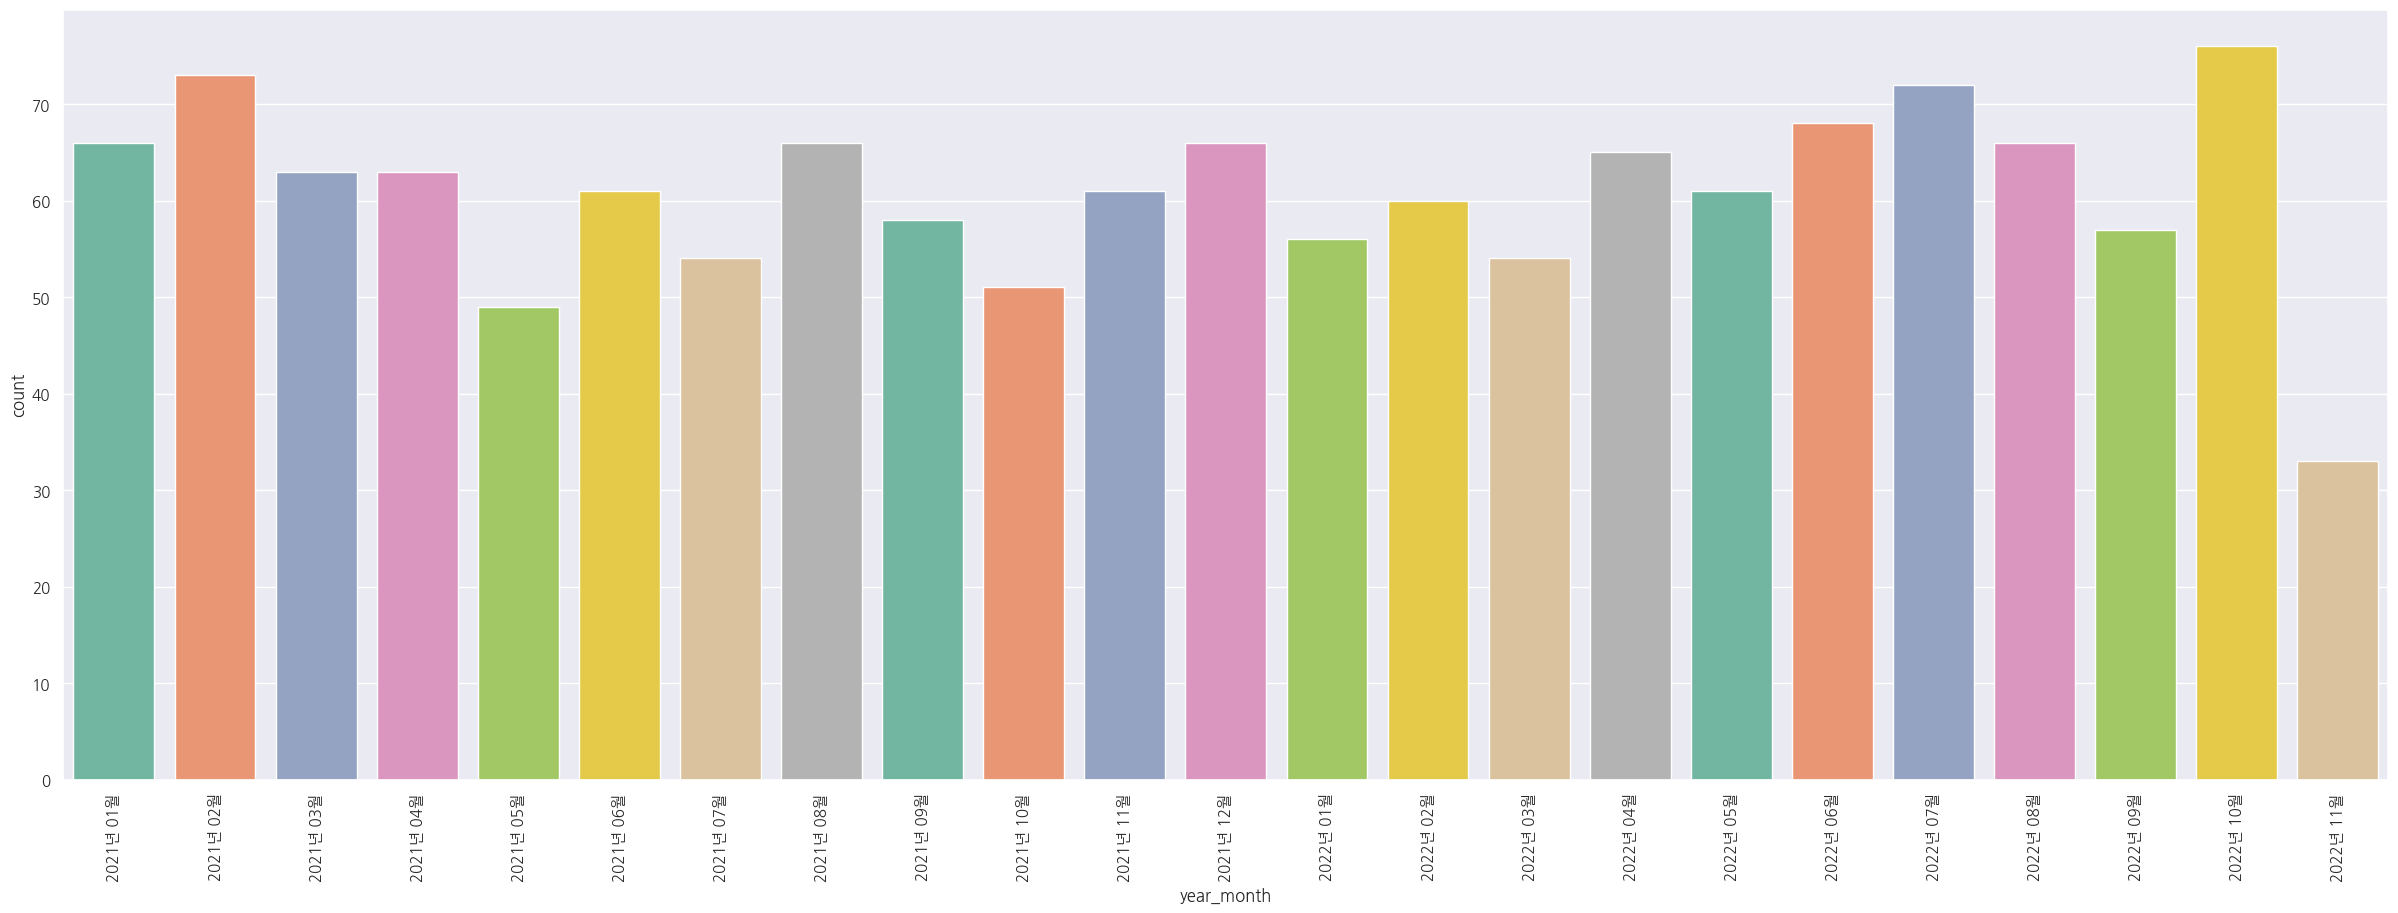

In [68]:
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

plt.figure(figsize=(30,10))

sns.set(font='NanumGothic', 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

ax = sns.countplot(x='year_month', data=EQK, palette="Set2", order=EQK_month.index)
plt.xticks(rotation=-270)
plt.show()

<h3>3.2 2021년, 2022년 지역별 지진발생횟수</h3>

In [69]:
EQK['location'] = EQK['위치']
EQK_region = EQK.groupby('location').count()["규모"].sort_values(ascending=False).head(20)
EQK_region

location
경북 경주시        123
경북 영덕군         81
전남 신안군 흑산도     69
제주 서귀포시        43
경북 포항시 북구      42
충북 괴산군         41
경북 포항시 남구      40
경북 김천시         34
경북 상주시         33
강원 삼척시         26
충남 태안군         24
전북 군산시 어청도     19
경북 문경시         19
울산 동구          19
전남 여수시 거문도     19
경북 울진군         19
경북 안동시         17
전남 영광군         16
충북 영동군         16
북한 함경북도 길주     15
Name: 규모, dtype: int64

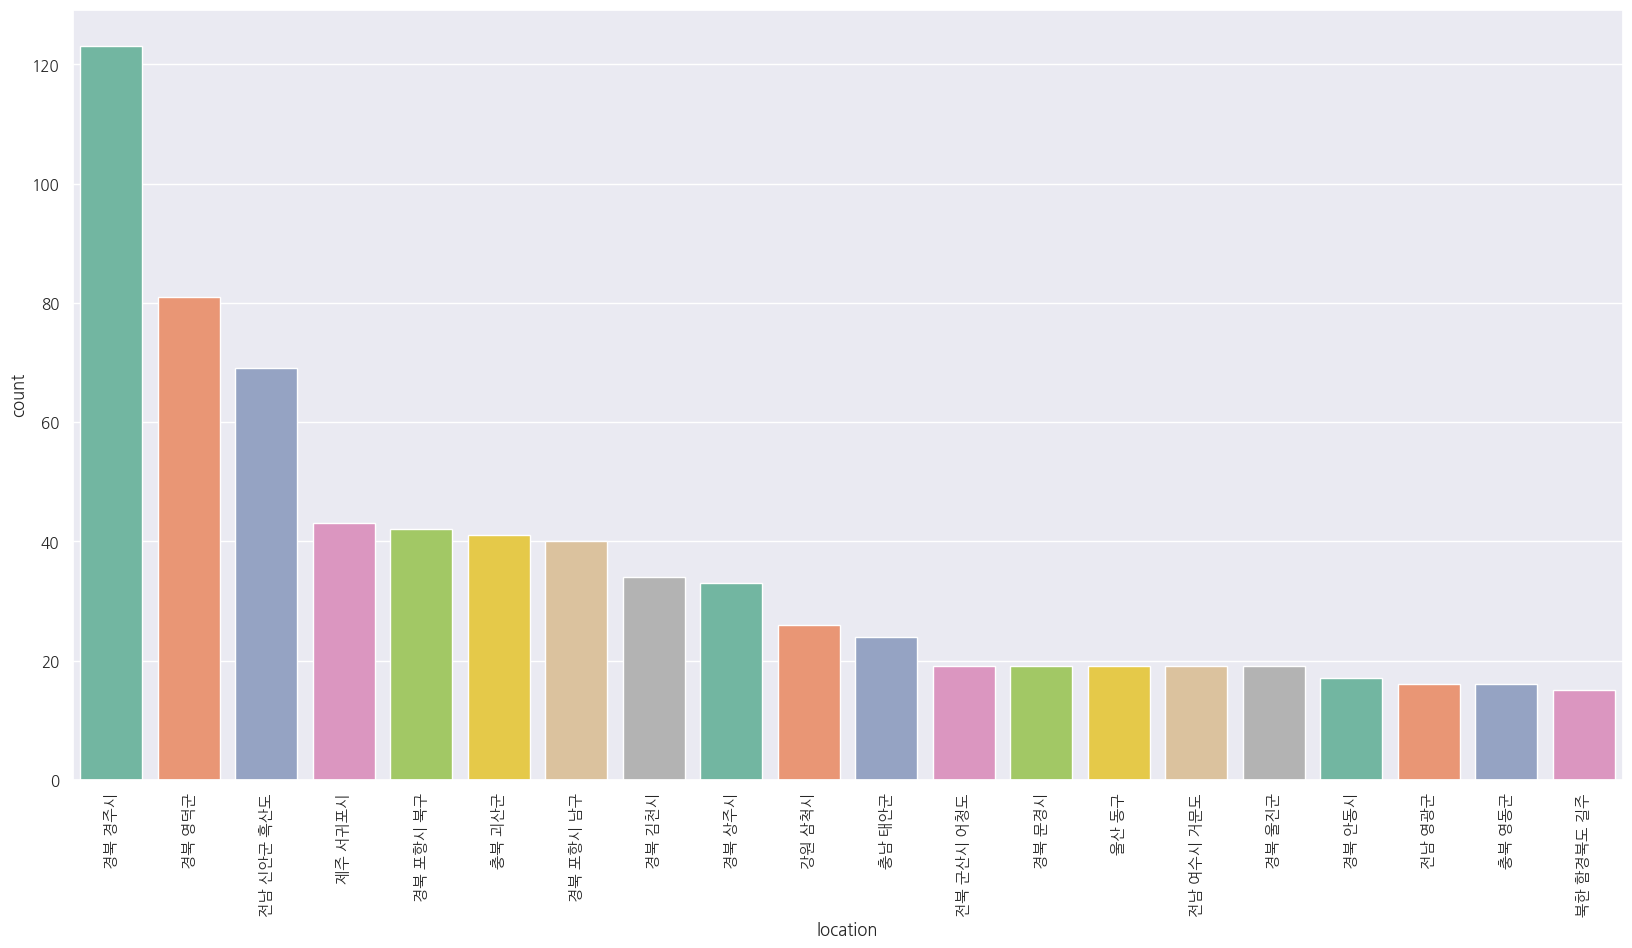

In [70]:
plt.figure(figsize=(20,10))
plt.rc('font', family="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

ax = sns.countplot(x='location', data=EQK, palette="Set2", order=EQK_region.index)
plt.xticks(rotation=-270)
plt.show()

In [71]:
EQK[EQK['location'] == '경북 경주시'].head(1)

,시간,규모,진앙(km),위도,경도,위치,year_month,location
9,2021-03-16,2.6,18,35.76,129.19,경북 경주시,2021년 03월,경북 경주시


<h3>3.3 2021년, 2022년 지진규모별 지진발생횟수</h3>

In [72]:
EQK_size = EQK.groupby('규모').count()["위치"].sort_values(ascending=False)
EQK_size = pd.DataFrame(EQK_size).reset_index().rename(columns={'위치':'count'})

EQK_size

,규모,count
0,1.4,160
1,1.2,154
2,1.3,141
3,1.6,138
4,1.5,135
5,1.1,112
6,1.7,106
7,1.0,78
8,1.9,69
9,1.8,64


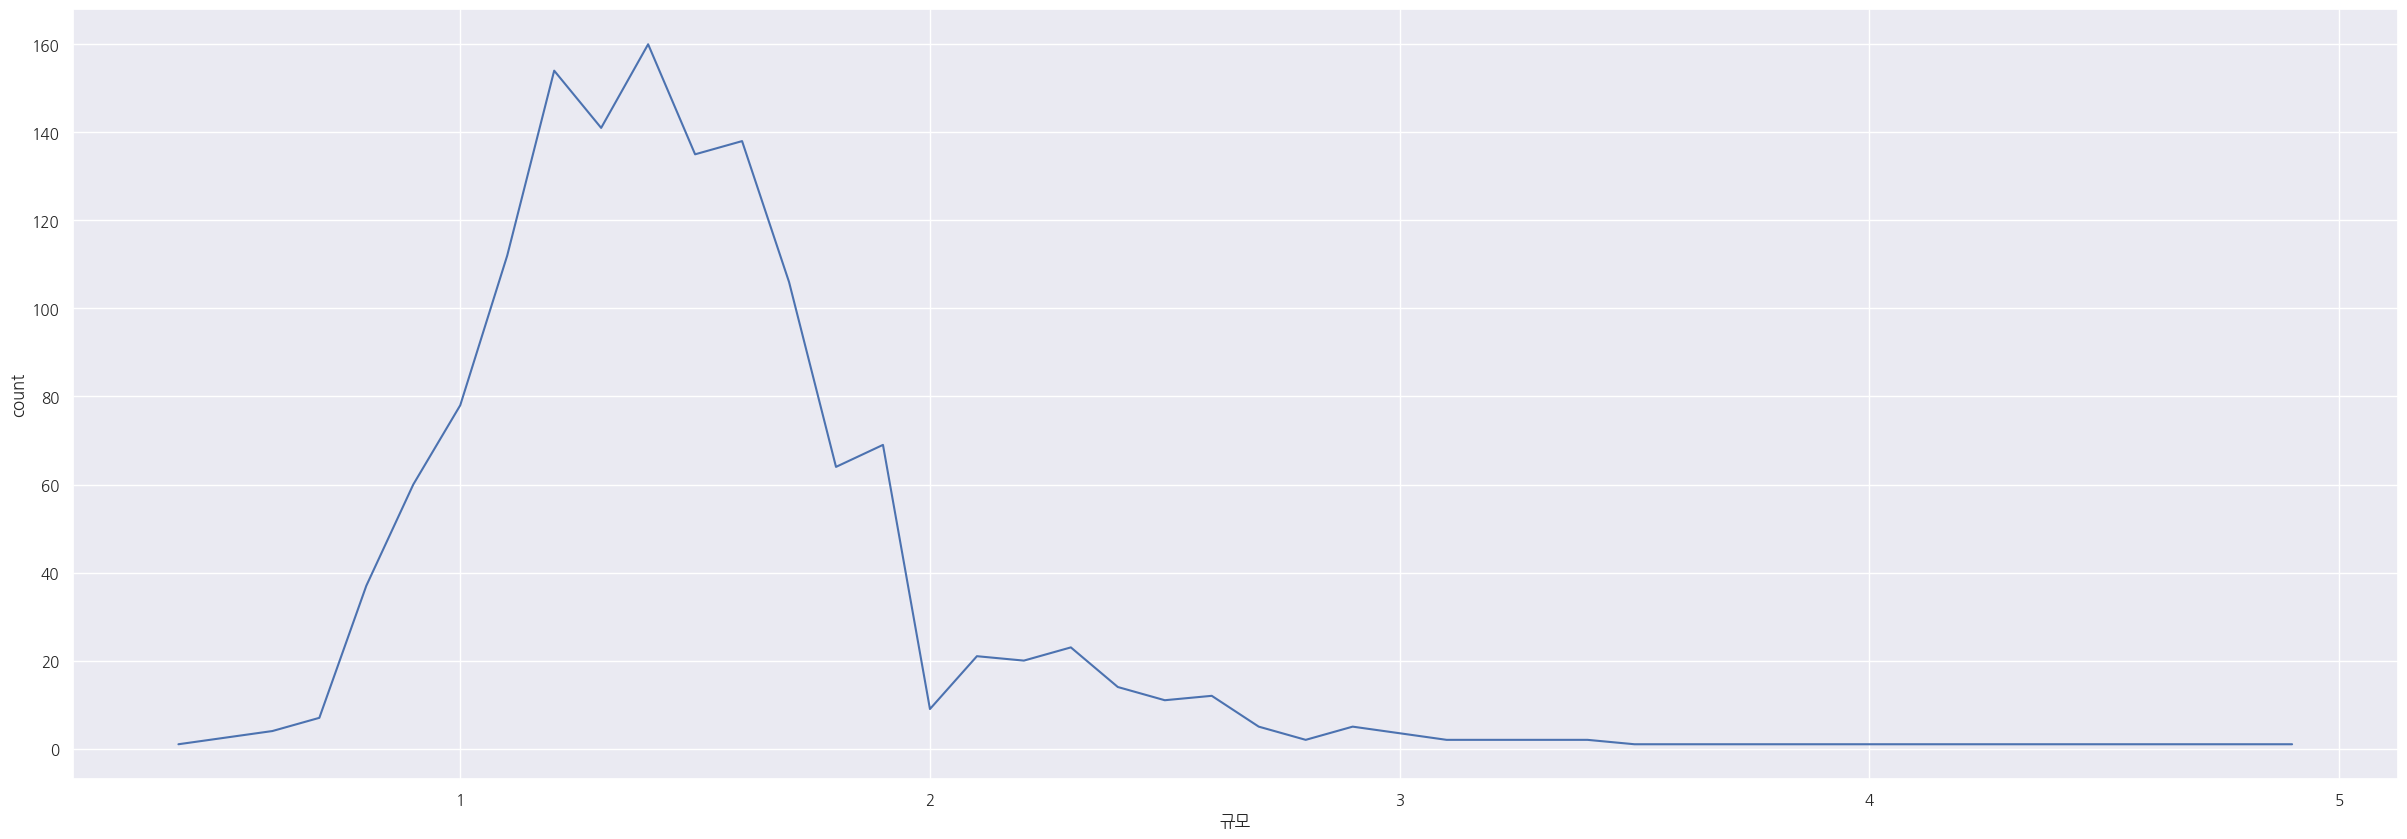

In [76]:
plt.figure(figsize=(30,10))
plt.rc('font', family="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False
ax = sns.lineplot(x='규모',y='count', data=EQK_size)
plt.show()

<h3>3.4 2021년, 2022년 진앙깊이별 지진발생횟수</h3>

In [74]:
EQK_depth = pd.DataFrame(EQK.groupby("진앙(km)").count()["규모"]).rename(columns={"규모":"지진발생횟수"})
EQK_depth

,지진발생횟수
진앙(km),
0,33
1,8
2,14
3,17
4,35
5,47
6,52
7,61
8,71


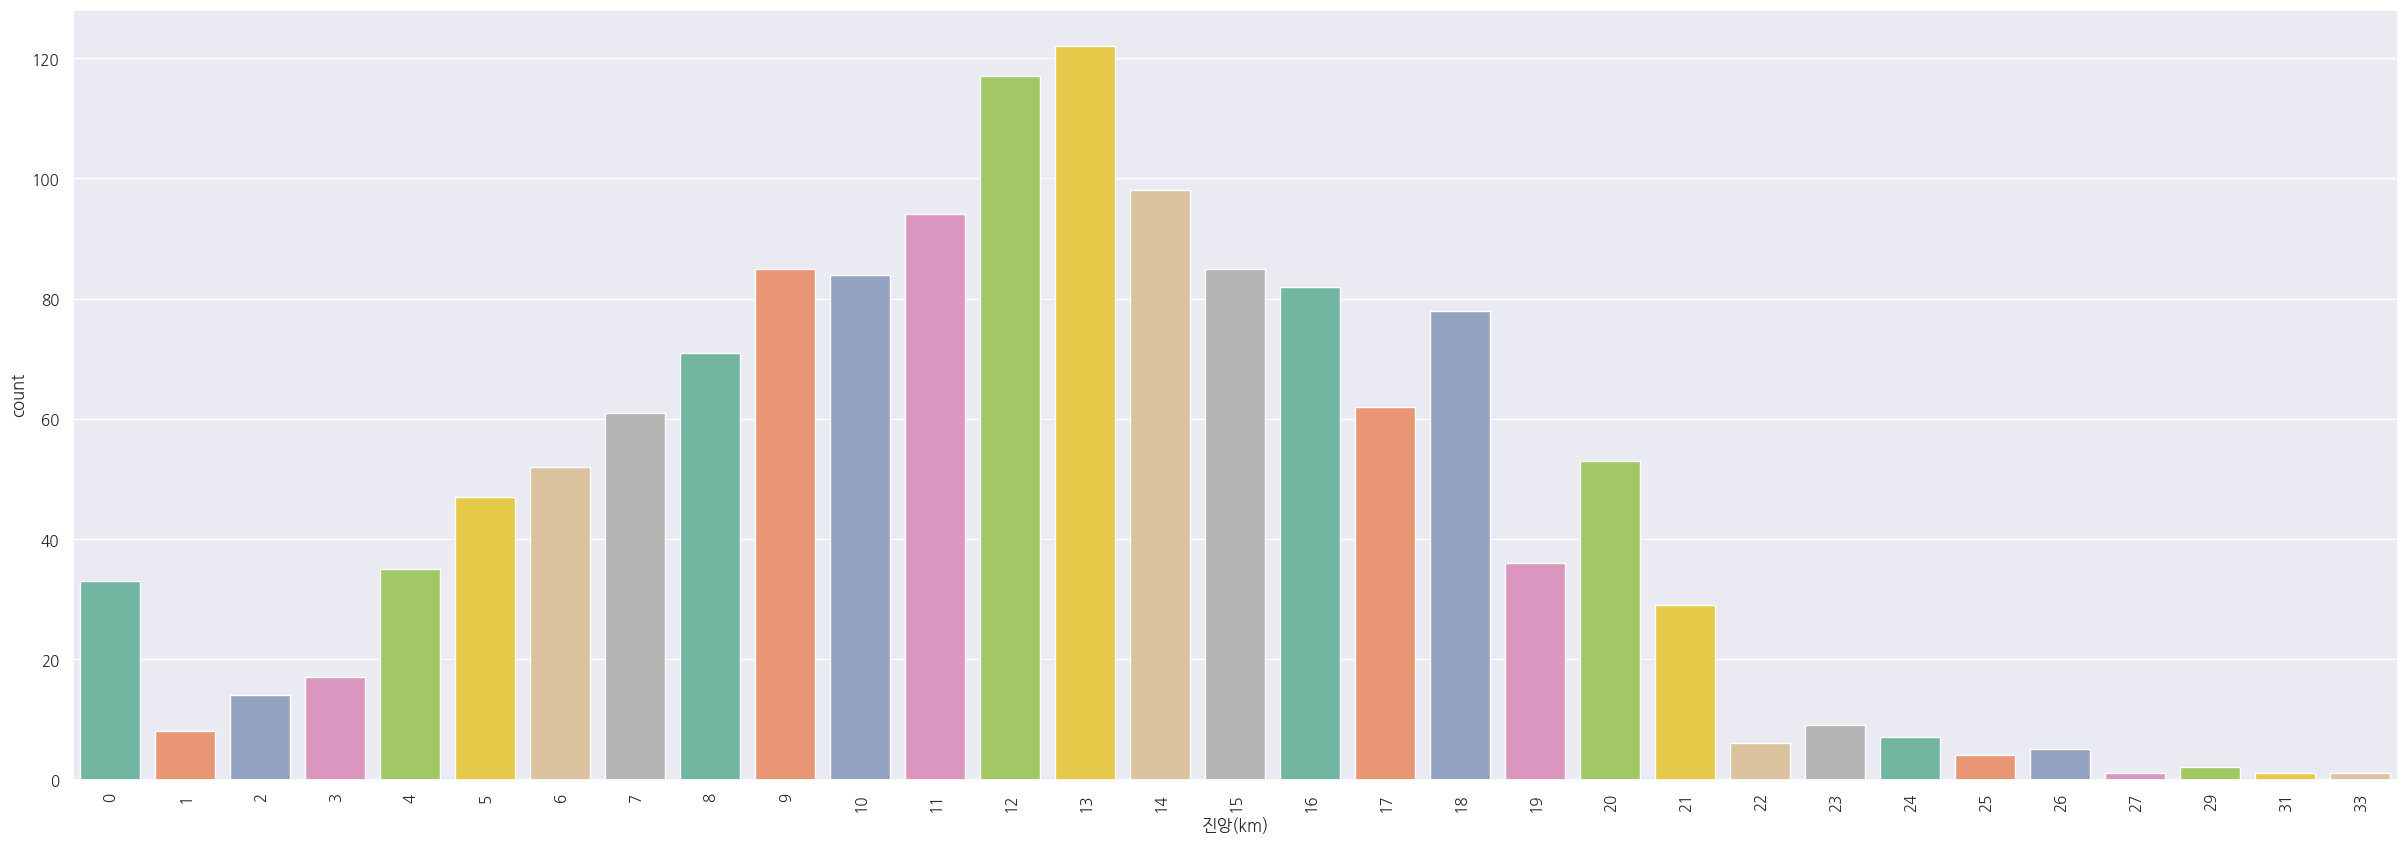

In [75]:
plt.figure(figsize=(30,10))

# 한글 출력을 위해서 폰트 옵션을 설정합니다.
sns.set(font='NanumGothic', 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

ax = sns.countplot(x='진앙(km)', data=EQK, palette="Set2", order=EQK_depth.index)
plt.xticks(rotation=-270)
plt.show()